In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

(1797, 64)


<Figure size 432x288 with 0 Axes>

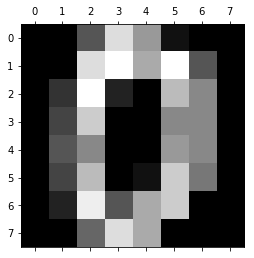

In [4]:
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

### Saving X(features) and y(target) as dataframes

In [5]:
x=digits.data
y=digits.target

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
print(x)
type(x)
x[0:1]

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
print(y)
type(y)

[0 1 2 ... 8 9 8]


numpy.ndarray

In [9]:
X=pd.DataFrame(x)
Y=pd.DataFrame(y, columns = ['output'])

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
Y.head()

,output
0,0
1,1
2,2
3,3
4,4


### Splitting the dataset into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

### Appying Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\Shivams\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred=classifier.predict(x_test)

### Predicting the values of various performance metrics

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [16]:
accuracy_score(y_test,y_pred)

0.9533333333333334

In [17]:
confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 45,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]], dtype=int64)

In [18]:
r2_score(y_test, y_pred)

0.8610684872701464

In [19]:
mean_absolute_error(y_test, y_pred)

0.2

In [20]:
mean_squared_error(y_test, y_pred)

1.1155555555555556

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [22]:
y_pred_prob = classifier.predict_proba(x_test)

In [23]:
y_pred_prob

array([[2.04008917e-09, 8.59677414e-11, 9.99996463e-01, ...,
        8.78183640e-09, 3.52250551e-06, 1.11538214e-11],
       [3.27971513e-10, 1.21309480e-06, 7.23121710e-06, ...,
        5.02088111e-11, 6.95433449e-01, 1.83481907e-09],
       [2.57674294e-16, 3.67950331e-10, 9.99997684e-01, ...,
        1.40550377e-10, 2.30960755e-06, 2.29108899e-12],
       ...,
       [1.56780851e-08, 2.25536185e-06, 3.49345563e-14, ...,
        9.63874158e-14, 1.40472717e-06, 4.30078729e-06],
       [7.41750595e-17, 7.58811435e-01, 6.62233517e-09, ...,
        4.41229137e-13, 1.14734222e-01, 2.74027949e-14],
       [3.37624738e-07, 1.41522335e-15, 5.59001042e-11, ...,
        1.38289231e-13, 4.36754000e-06, 9.99994281e-01]])

In [24]:
print(log_loss(y_test['output'], y_pred_prob))

0.18820653637165877
